<a href="https://colab.research.google.com/github/FBWeimer/sEMG/blob/main/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

USING GOOGLE COLABORATORY IN THIS EXAMPLE

In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)  # Mount your Google Drive in Google Colab

Mounted at /content/drive/


If it is your first access, you can use the code below:

In [2]:
import sys

path = '/content/drive/My Drive/Bases de Dados/Hand-Arm/Codes/sEMG/sEMG/'
# Change the path above to your own path where the repository it is saved

sys.path.append(path)

In [3]:
import pickle
import preprocessing as preEMG
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [4]:
import preprocessing as preEMG

In [5]:
# Declare path, database and exercise type
root_dir = '/content/drive/MyDrive/Bases de Dados/'  # Folder where the database it is saved
base_dir = 'Hand-Arm/IEE/'  # The database name
subj = '1'  # Subject of the database
exerc = '1'  # Exercise of the database
assay = 'A'  # Assay of the database

In [6]:
data = preEMG.Data(root_dir)  # Defining data object

In [7]:
emg_raw = data.load_iee(base_dir, subj, exerc, assay)  # Loading EMG data

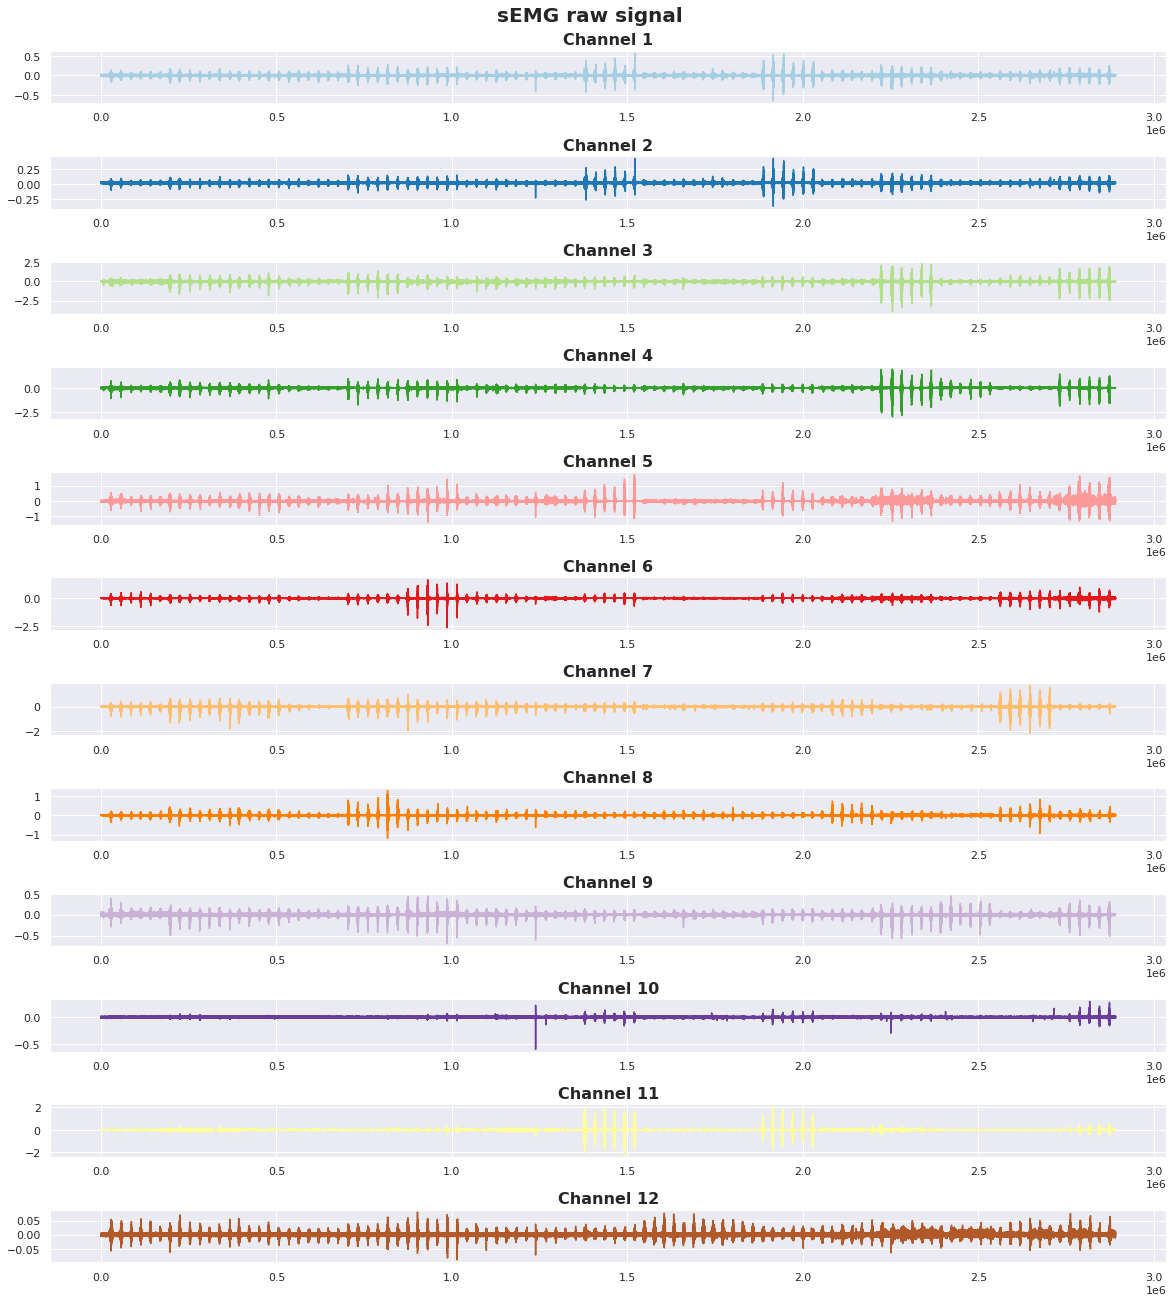

In [8]:
emg_data = preEMG.Signal(emg_raw, 2000, 12)  # Defining signal objetct
emg_data.plot(emg_raw, title='sEMG raw signal')

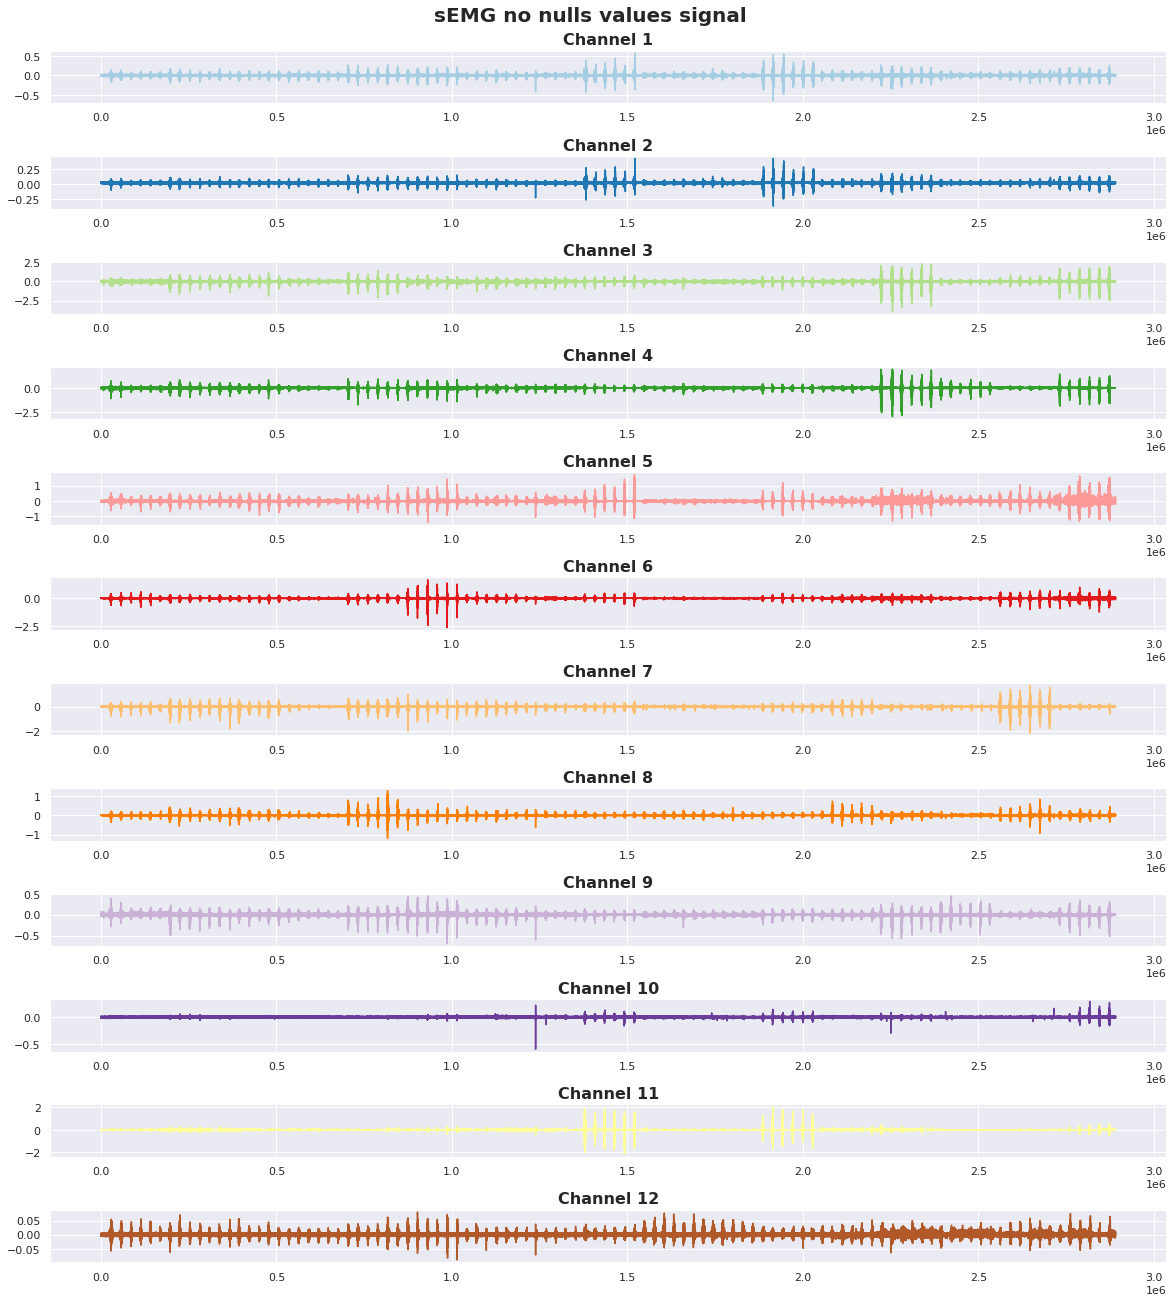

In [9]:
emg_nonull = emg_data.remove_null()  # Filtering null values in EMG data
emg_data.plot(emg_nonull, title='sEMG no nulls values signal')

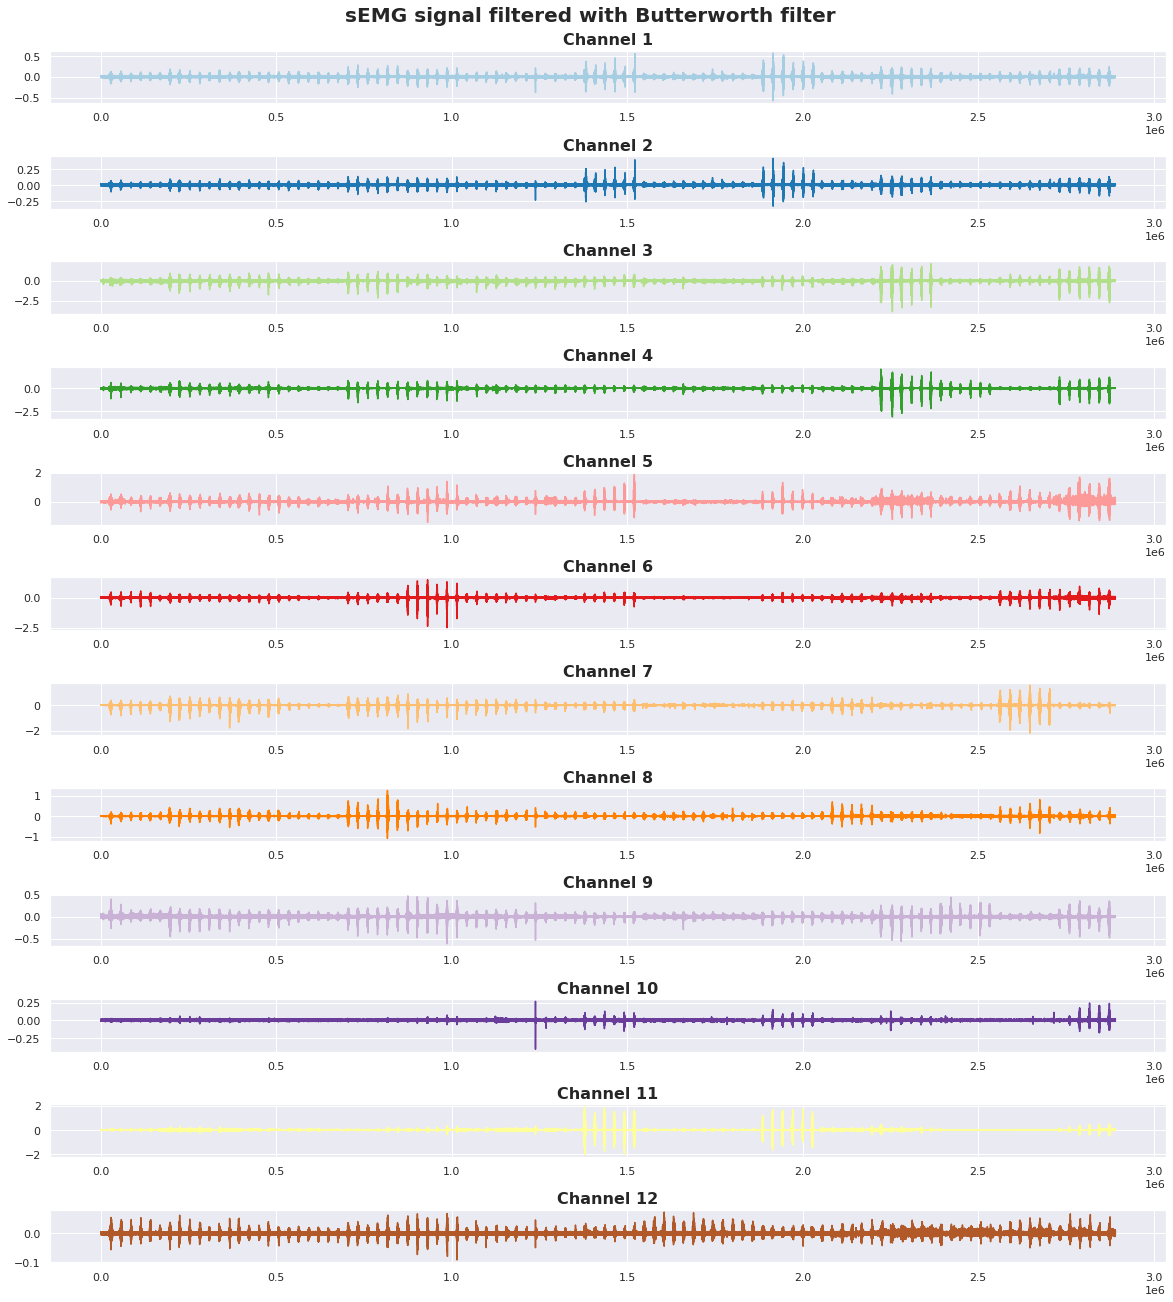

In [10]:
emg_filtered = emg_data.butter_filter(emg_nonull)  # Filtering EMG data with bandpass Butterworth filter
emg_data.plot(emg_filtered, title='sEMG signal filtered with Butterworth filter')

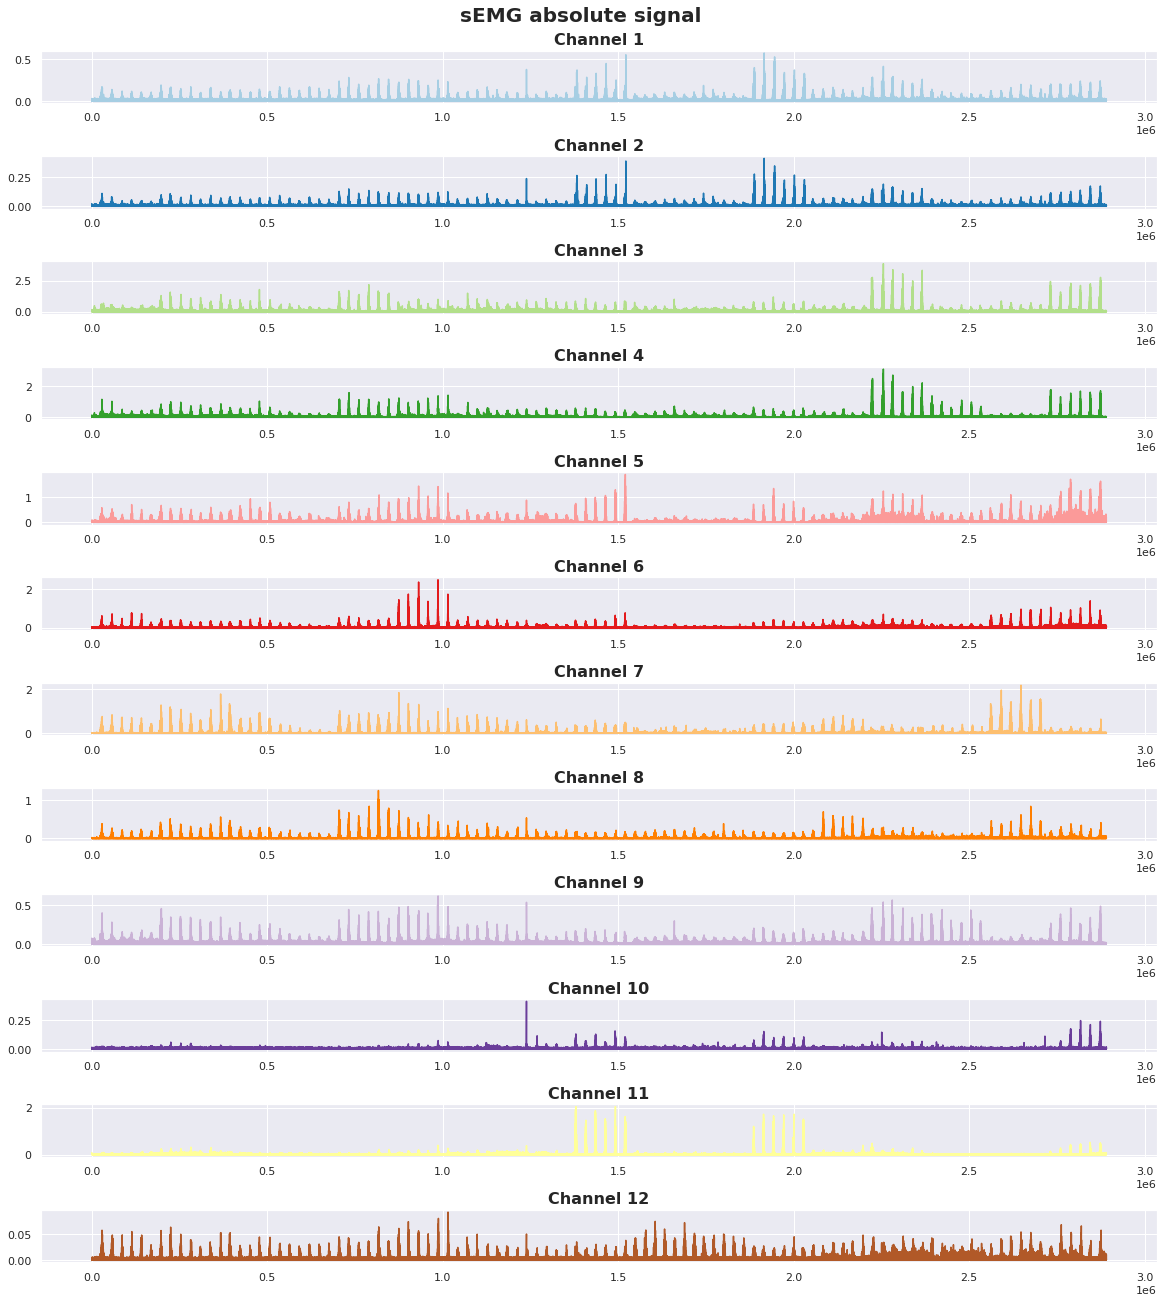

In [11]:
emg_abs = emg_filtered.abs()
emg_data.plot(emg_abs, title='sEMG absolute signal')

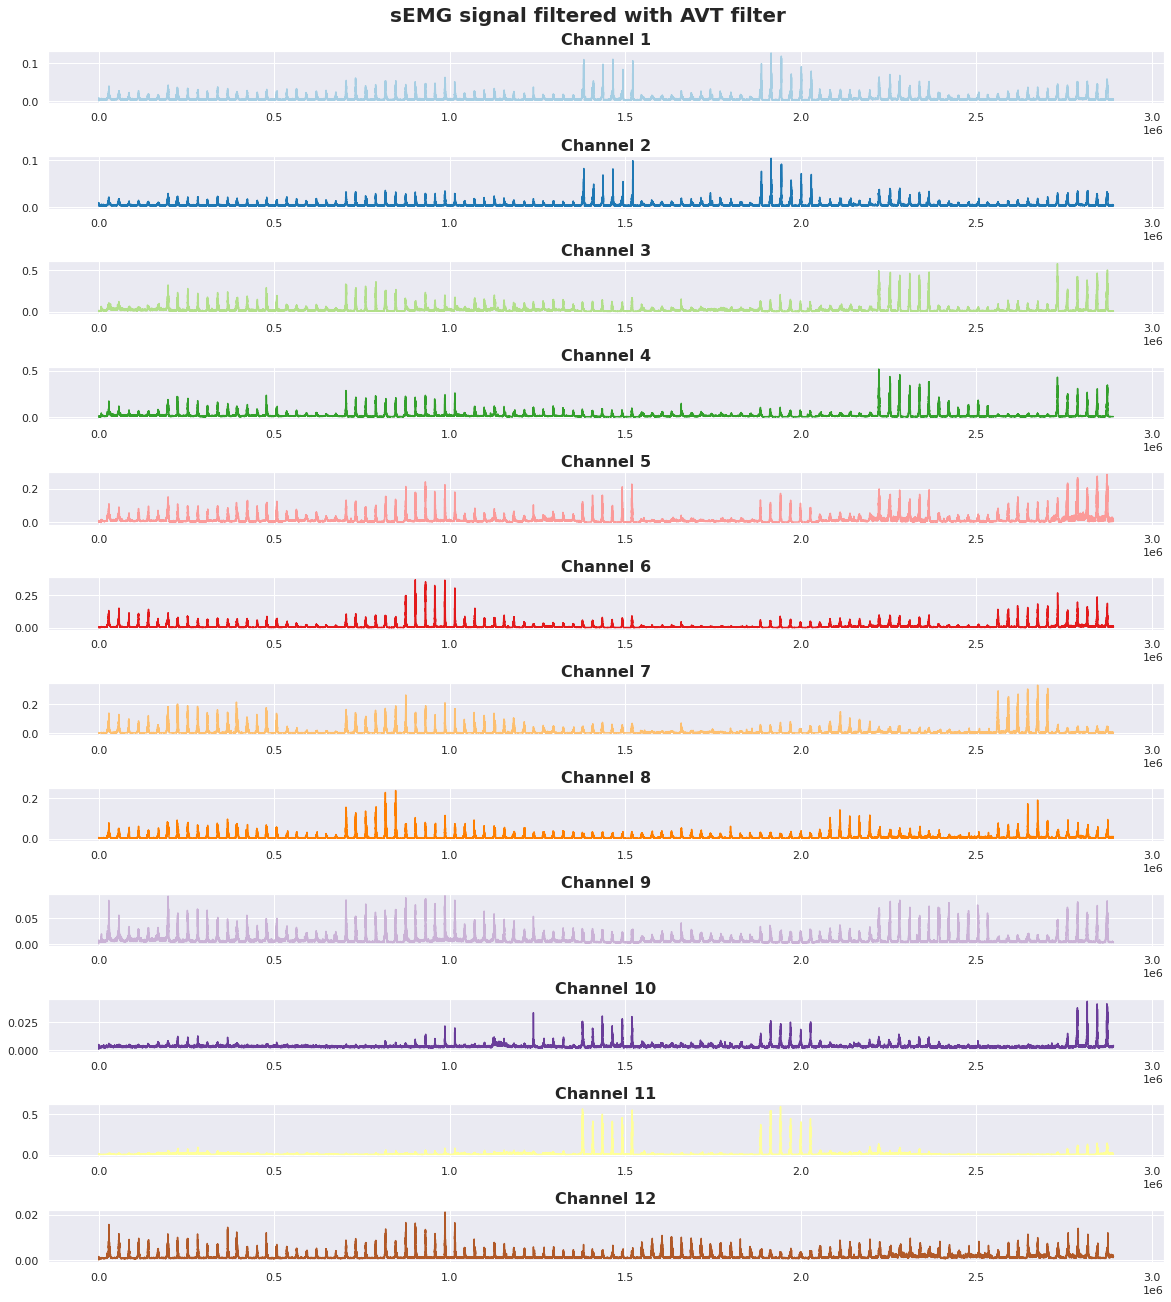

In [12]:
emg_avt = emg_data.avt_filter(emg_abs, 0.8, 0.2, 300, 15)  # Filtering EMG data with AVT filter
emg_data.plot(emg_avt, title='sEMG signal filtered with AVT filter')

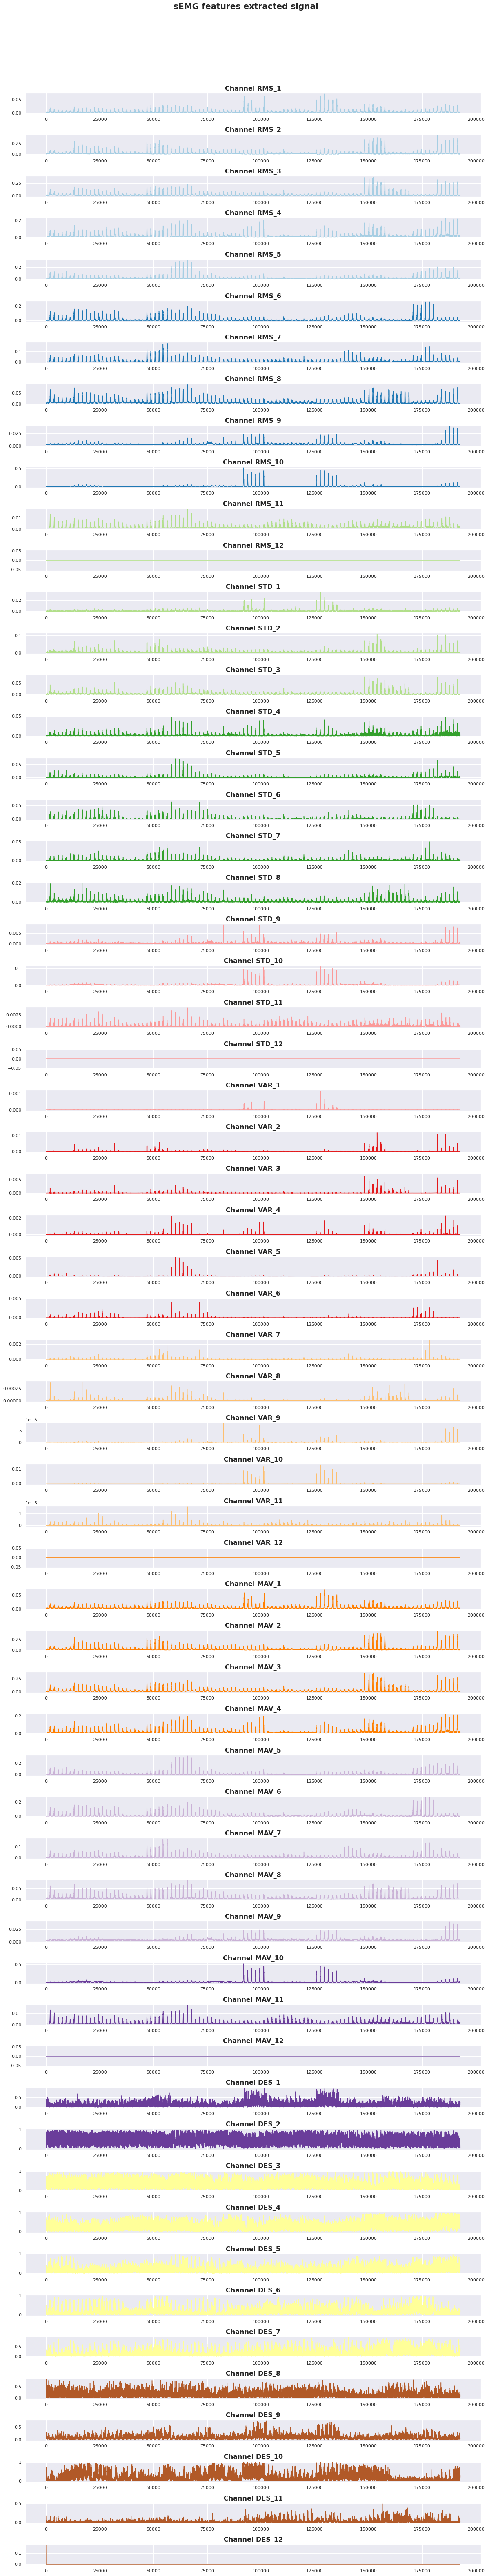

In [13]:
emg_feat = emg_data.feature_extraction(emg_avt, 300, 15)  # Extracting features from  EMG data
emg_data.plot(emg_feat, title='sEMG features extracted signal')

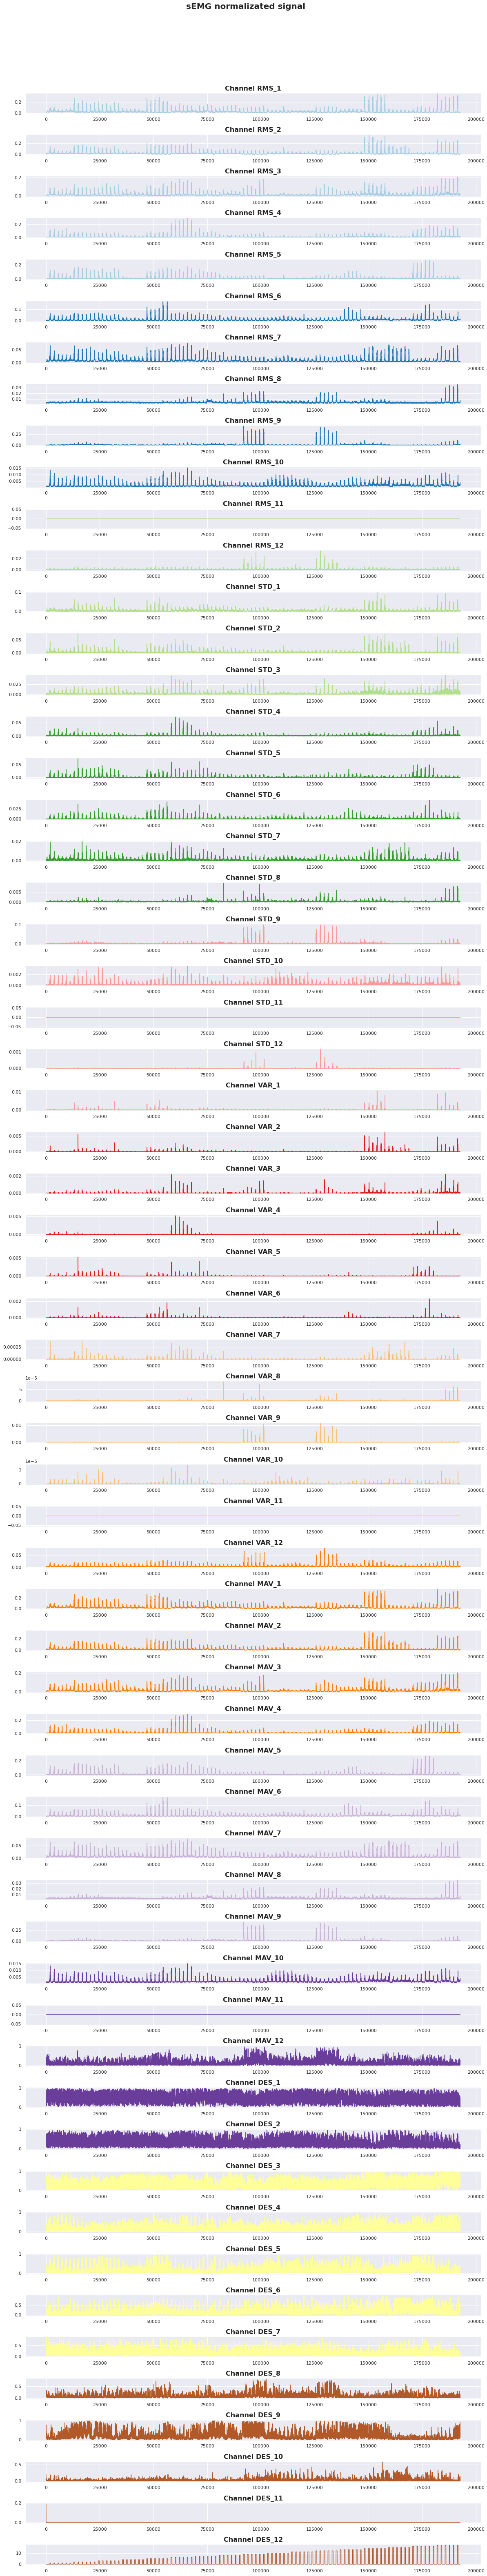

In [14]:
emg_norm = emg_data.normalize_signal(emg_feat)  #  Normalizing EMG data
emg_data.plot(emg_norm, title='sEMG normalizated signal')

In [15]:
X_EMG = emg_norm.loc[:, emg_norm.columns != 'label'].values  # Selecting predictor variables
y_emg = emg_norm['label'].values  # Selecting response variables

In [16]:
# Spliting EMG data to train and test
X_EMG_train, X_EMG_test, y_emg_train, y_emg_test = train_test_split(X_EMG, y_emg, test_size=0.25, random_state=0)

In [ ]:
folder = '/content/drive/MyDrive/Bases de Dados/Hand-Arm/'  # Folder where desire save the pre-processing EMG data
path = 'Pre-processing/IEE/s1/'  # Pre-processing database folder
archive='S1_A1.pkl'

with open(root_dir+preproc_dir+archive, mode='wb') as f:

  pickle.dump([X_EMG_train, y_emg_train, X_EMG_test, y_emg_test], f)  # Save the pré-processed data
                                                                      # in .pkl format